# Replication of results from Anderson et al. 2016

In [42]:
import numpy as np
import scipy.io
import xarray as xr
import pyhsmm_mvpa as hsmm
import itertools
import multiprocessing 
import matplotlib.pyplot as plt


cpus = multiprocessing.cpu_count()

%load_ext autoreload
%autoreload 2


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Initial fit

Reading the data

In [43]:
mat = scipy.io.loadmat('matlab/newbumps/starter.mat')

data = np.array(mat['normedscore10'])
starts = np.array(mat['x'][:,0]) -1#correcting to be 0 indexed
ends = np.array(mat['y'][:,0])-1#correcting to be 0 indexed
subjects = np.array(mat['subjects'])-1 #correcting to be 0 indexed

Initializing the hsmm object with data, starts, sampling frequency... all things shared across the different following fit

In [44]:
init = hsmm.hsmm(data, starts, ends, sf=100, bump_width=50)

Estimating the model with the maximum number of bumps possible

In [61]:
max_estimates = init.fit_single(init.max_bumps())

Estimating parameters for 8 bumps model


/home/gweindel/owncloud/projects/RUGUU/pyhsmm-mvpa/pyhsmm_mvpa.py:178: UserWarning: Using default parameters value for gamma parameters
  warnings.warn('Using default parameters value for gamma parameters')
/home/gweindel/owncloud/projects/RUGUU/pyhsmm-mvpa/pyhsmm_mvpa.py:184: UserWarning: Using default parameters value for magnitudes
  warnings.warn('Using default parameters value for magnitudes')


(300,)
(300,)
(300,)
(300,)
(300,)
(300,)
(300,)
(300,)
(300,)
(300,)
(300,)
(300,)
(300,)
(300,)
(300,)
(300,)
(300,)
(300,)
(300,)
(300,)
(300,)
(300,)
(300,)
(300,)
(300,)
(300,)
(300,)
(300,)
(300,)
(300,)
(300,)
(300,)
(300,)
(300,)
(300,)
(300,)
(300,)
(300,)
(300,)
(300,)
(300,)
(300,)
(300,)
(300,)
(300,)
(300,)
(300,)
Parameters estimated for 8 bumps model


Example output:

## Iterative estimation of bumps from 1 to max_bumps

In [64]:
with multiprocessing.Pool(processes=cpus) as pool:
    iterative_results = pool.map(init.fit_single, np.arange(1,init.max_bumps()+1))
iterative_results = xr.concat(iterative_results, dim="n_bumps")
#For the single CPU automated version : init.fit_iterative(init.max_bumps())

Estimating parameters for 1 bumps model


/home/gweindel/owncloud/projects/RUGUU/pyhsmm-mvpa/pyhsmm_mvpa.py:178: UserWarning: Using default parameters value for gamma parameters
  warnings.warn('Using default parameters value for gamma parameters')
/home/gweindel/owncloud/projects/RUGUU/pyhsmm-mvpa/pyhsmm_mvpa.py:184: UserWarning: Using default parameters value for magnitudes
  warnings.warn('Using default parameters value for magnitudes')


Estimating parameters for 2 bumps model


/home/gweindel/owncloud/projects/RUGUU/pyhsmm-mvpa/pyhsmm_mvpa.py:178: UserWarning: Using default parameters value for gamma parameters
  warnings.warn('Using default parameters value for gamma parameters')
/home/gweindel/owncloud/projects/RUGUU/pyhsmm-mvpa/pyhsmm_mvpa.py:184: UserWarning: Using default parameters value for magnitudes
  warnings.warn('Using default parameters value for magnitudes')


Estimating parameters for 3 bumps model


/home/gweindel/owncloud/projects/RUGUU/pyhsmm-mvpa/pyhsmm_mvpa.py:178: UserWarning: Using default parameters value for gamma parameters
  warnings.warn('Using default parameters value for gamma parameters')
/home/gweindel/owncloud/projects/RUGUU/pyhsmm-mvpa/pyhsmm_mvpa.py:184: UserWarning: Using default parameters value for magnitudes
  warnings.warn('Using default parameters value for magnitudes')


Estimating parameters for 4 bumps model


/home/gweindel/owncloud/projects/RUGUU/pyhsmm-mvpa/pyhsmm_mvpa.py:178: UserWarning: Using default parameters value for gamma parameters
  warnings.warn('Using default parameters value for gamma parameters')
/home/gweindel/owncloud/projects/RUGUU/pyhsmm-mvpa/pyhsmm_mvpa.py:184: UserWarning: Using default parameters value for magnitudes
  warnings.warn('Using default parameters value for magnitudes')


Estimating parameters for 5 bumps model


/home/gweindel/owncloud/projects/RUGUU/pyhsmm-mvpa/pyhsmm_mvpa.py:178: UserWarning: Using default parameters value for gamma parameters
  warnings.warn('Using default parameters value for gamma parameters')
/home/gweindel/owncloud/projects/RUGUU/pyhsmm-mvpa/pyhsmm_mvpa.py:184: UserWarning: Using default parameters value for magnitudes
  warnings.warn('Using default parameters value for magnitudes')


Estimating parameters for 6 bumps model


/home/gweindel/owncloud/projects/RUGUU/pyhsmm-mvpa/pyhsmm_mvpa.py:178: UserWarning: Using default parameters value for gamma parameters
  warnings.warn('Using default parameters value for gamma parameters')
/home/gweindel/owncloud/projects/RUGUU/pyhsmm-mvpa/pyhsmm_mvpa.py:184: UserWarning: Using default parameters value for magnitudes
  warnings.warn('Using default parameters value for magnitudes')


Estimating parameters for 7 bumps model


/home/gweindel/owncloud/projects/RUGUU/pyhsmm-mvpa/pyhsmm_mvpa.py:178: UserWarning: Using default parameters value for gamma parameters
  warnings.warn('Using default parameters value for gamma parameters')
/home/gweindel/owncloud/projects/RUGUU/pyhsmm-mvpa/pyhsmm_mvpa.py:184: UserWarning: Using default parameters value for magnitudes
  warnings.warn('Using default parameters value for magnitudes')


Estimating parameters for 8 bumps model


/home/gweindel/owncloud/projects/RUGUU/pyhsmm-mvpa/pyhsmm_mvpa.py:178: UserWarning: Using default parameters value for gamma parameters
  warnings.warn('Using default parameters value for gamma parameters')
/home/gweindel/owncloud/projects/RUGUU/pyhsmm-mvpa/pyhsmm_mvpa.py:184: UserWarning: Using default parameters value for magnitudes
  warnings.warn('Using default parameters value for magnitudes')


Parameters estimated for 1 bumps model
Parameters estimated for 5 bumps model
Parameters estimated for 6 bumps model
Parameters estimated for 2 bumps model
Parameters estimated for 3 bumps model
Parameters estimated for 4 bumps model
Parameters estimated for 7 bumps model
Parameters estimated for 8 bumps model


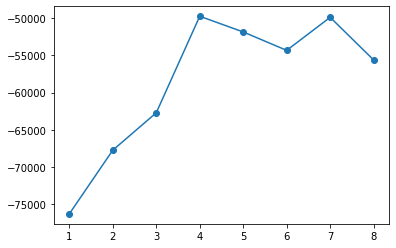

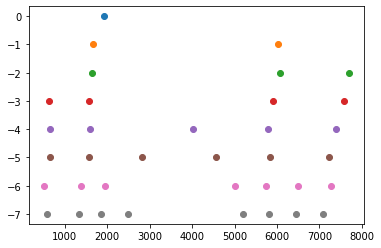

In [65]:
plt.plot(np.arange(init.max_bumps())+1, iterative_results.likelihoods,'o-')
plt.show()
for nbump in np.arange(init.max_bumps()):
    times = init.bump_times(iterative_results.sel(n_bumps=nbump),nbump)
    plt.plot(np.cumsum(times), -np.repeat(nbump, len(times)),'o')


In [ ]:
#Looping over possible number of bumps
subjects_idx = np.unique(subjects)
likelihoods_loo_classic = []

for subject in subjects_idx:
    print(f'Subject {subject}')
    #Extracting data from left out subject
    subjects_idx_loo = subjects_idx[subjects_idx != subject]

    starts_left_out_idx = np.array([starts[idx] for idx, s in enumerate(subjects) if s not in subjects_idx_loo])
    ends_left_out_idx = np.array([ends[idx] for idx, s in enumerate(subjects) if s not in subjects_idx_loo])

    #Correct starts indexes to account for reoved subject, whole indexing needs improvement
    starts_loo = np.concatenate([starts[starts < starts_left_out_idx[0]], starts[starts > ends_left_out_idx[-1]]-ends_left_out_idx[-1]+1])
    ends_loo = np.concatenate([ends[ends < starts_left_out_idx[0]], ends[ends > ends_left_out_idx[-1]]-ends_left_out_idx[-1]])
    ends_loo[-1] = ends_loo[-1]-1
    starts_left_out = np.array([start - starts_left_out_idx[0]  for start in starts if start >= starts_left_out_idx[0] and start <= ends_left_out_idx[-1]])
    ends_left_out = np.array([end - starts_left_out_idx[0]  for end in ends if end >= starts_left_out_idx[0] and end <= ends_left_out_idx[-1]])


    samples_loo = np.array([sample for idx,sample in enumerate(data) if idx < starts_left_out_idx[0] or idx > ends_left_out_idx[-1]])
    samples_left_out = np.array([sample for idx,sample in enumerate(data) if idx >= starts_left_out_idx[0] and idx <= ends_left_out_idx[-1]])
    #Fitting the HsMM using previous estimated parameters as initial parameters
    model_loo = hsmm.hsmm(samples_loo, starts_loo, ends_loo, sf=100)
    with multiprocessing.Pool(processes=cpus) as pool:
        iterative_results_loo = pool.starmap(model_loo.fit_single, 
            zip(np.arange(1,init.max_bumps()+1),#init.max_bumps to ensure that same number of maxbumps
                iterative_results.magnitudes, iterative_results.parameters, itertools.repeat(1), itertools.repeat(False), itertools.repeat(True)))
    iterative_results_loo = xr.concat(iterative_results_loo, dim="n_bumps")
    
    model_left_out = hsmm.hsmm(samples_left_out, starts_left_out, ends_left_out, sf=100)
    with multiprocessing.Pool(processes=cpus) as pool:
        likelihoods = pool.starmap(model_left_out.calc_EEG_50h, 
            zip(iterative_results_loo.magnitudes,
                iterative_results_loo.parameters,
                np.arange(1,init.max_bumps()+1),itertools.repeat(True),itertools.repeat(True)))
    likelihoods_loo_classic.append(likelihoods)
    np.save('likelihoods_loo_classic',likelihoods_loo_classic)

Subject 0
Estimating parameters for 1 bumps model
Estimating parameters for 2 bumps model
Estimating parameters for 3 bumps model
Estimating parameters for 4 bumps model
Estimating parameters for 5 bumps model
Estimating parameters for 6 bumps model
Estimating parameters for 7 bumps model
Estimating parameters for 8 bumps model
Parameters estimated for 1 bumps model
Parameters estimated for 2 bumps model
Parameters estimated for 3 bumps model
Parameters estimated for 4 bumps model


In [ ]:
plt.plot(np.mean(np.array(likelihoods_loo_classic),axis=0),'o-')

## Roll-back estimation of bumps from max_bumps to 1 bumps

Getting the max n_bumps estimate first

In [ ]:
max_estimates

In [ ]:
bump_loo_results = [max_estimates]

i = 1
for n_bumps in np.arange(init.max_bumps(),1,-1):
    temp_best = bump_loo_results[-i]
    n_bumps_list = np.arange(n_bumps)
    possible_bumps = list(itertools.combinations(n_bumps_list, n_bumps-1))
    possible_flats = list(itertools.combinations(n_bumps_list+1, n_bumps-1))
    possible_flats = [np.insert(x,0,0) for x in possible_flats]
    with multiprocessing.Pool(processes=cpus) as pool:
        bump_loo_likelihood_temp = pool.starmap(init.fit_single, 
            zip(itertools.repeat(n_bumps-1),temp_best.magnitudes.values.T[possible_bumps,:],
                temp_best.parameters.values[possible_flats,:],
                itertools.repeat(1),itertools.repeat(True)))
                #repeat(np.tile([1,50], (n_bumps,1))),
                #repeat(np.tile([2,12], (n_bumps,1)))))
    models = xr.concat(bump_loo_likelihood_temp, dim="iteration")
    bump_loo_results.append(models.sel(iteration=[np.where(models.likelihoods ==models.likelihoods.max())[0][0]]))
    i+=1
bests = xr.concat(bump_loo_results, dim="n_bumps")
bests = bests.assign_coords({"n_bumps": np.arange(init.max_bumps(),0,-1)})
bests = bests.squeeze('iteration')
bests.to_netcdf('bests.nc')
bests

In [ ]:
plt.plot(np.arange(init.max_bumps())+1, bests.likelihoods[::-1],'o-')
plt.show()
for nbump in np.arange(init.max_bumps()-1,0,-1):
    times = init.bump_times(bests.sel(n_bumps=nbump),nbump)
    plt.plot(np.cumsum(times), -np.repeat(nbump, len(times)),'o')


In [ ]:

#Looping over possible number of bumps
subjects_idx = np.unique(subjects)
likelihoods_loo = []

for subject in subjects_idx:
    print(f'Subject {subject}')
    #Extracting data from left out subject
    subjects_idx_loo = subjects_idx[subjects_idx != subject]

    starts_left_out_idx = np.array([starts[idx] for idx, s in enumerate(subjects) if s not in subjects_idx_loo])
    ends_left_out_idx = np.array([ends[idx] for idx, s in enumerate(subjects) if s not in subjects_idx_loo])

    #Correct starts indexes to account for reoved subject, whole indexing needs improvement
    starts_loo = np.concatenate([starts[starts < starts_left_out_idx[0]], starts[starts > ends_left_out_idx[-1]]-ends_left_out_idx[-1]+1])
    ends_loo = np.concatenate([ends[ends < starts_left_out_idx[0]], ends[ends > ends_left_out_idx[-1]]-ends_left_out_idx[-1]])
    ends_loo[-1] = ends_loo[-1]-1
    starts_left_out = np.array([start - starts_left_out_idx[0]  for start in starts if start >= starts_left_out_idx[0] and start <= ends_left_out_idx[-1]])
    ends_left_out = np.array([end - starts_left_out_idx[0]  for end in ends if end >= starts_left_out_idx[0] and end <= ends_left_out_idx[-1]])


    samples_loo = np.array([sample for idx,sample in enumerate(data) if idx < starts_left_out_idx[0] or idx > ends_left_out_idx[-1]])
    samples_left_out = np.array([sample for idx,sample in enumerate(data) if idx >= starts_left_out_idx[0] and idx <= ends_left_out_idx[-1]])
    #Fitting the HsMM using previous estimated parameters as initial parameters
    model_loo = hsmm.hsmm(samples_loo, starts_loo, ends_loo, sf=100)
    with multiprocessing.Pool(processes=cpus) as pool:
        iterative_results_loo = pool.starmap(model_loo.fit_single, 
            zip(np.arange(init.max_bumps(),0,-1),#init.max_bumps to ensure that same number of maxbumps
                bests.magnitudes, bests.parameters, itertools.repeat(1), itertools.repeat(False), itertools.repeat(True)))
    iterative_results_loo = xr.concat(iterative_results_loo, dim="n_bumps")
    
    model_left_out = hsmm.hsmm(samples_left_out, starts_left_out, ends_left_out, sf=100)
    with multiprocessing.Pool(processes=cpus) as pool:
        likelihoods = pool.starmap(model_left_out.calc_EEG_50h, 
            zip(iterative_results_loo.magnitudes,
                iterative_results_loo.parameters,
                np.arange(init.max_bumps(),0,-1),itertools.repeat(True),itertools.repeat(True)))
    likelihoods_loo.append(likelihoods)
    np.save('likelihoods_loo',likelihoods_loo)

In [ ]:
plt.plot(np.mean(np.array(likelihoods_loo),axis=0),'o-')

## Appendix

## Iterative estimation of bumps from 1 to max_bumps

In [ ]:
with multiprocessing.Pool(processes=cpus) as pool:
    iterative_results = pool.map(init.fit_single, np.arange(1,init.max_bumps()+1))
iterative_results = xr.concat(iterative_results, dim="n_bumps")
#For the single CPU automated version : init.fit_iterative(init.max_bumps())

Estimating parameters for 1 bumps model


/home/gweindel/owncloud/projects/RUGUU/pyhsmm-mvpa/pyhsmm_mvpa.py:178: UserWarning: Using default parameters value for gamma parameters
  warnings.warn('Using default parameters value for gamma parameters')
/home/gweindel/owncloud/projects/RUGUU/pyhsmm-mvpa/pyhsmm_mvpa.py:184: UserWarning: Using default parameters value for magnitudes
  warnings.warn('Using default parameters value for magnitudes')


Estimating parameters for 2 bumps model


/home/gweindel/owncloud/projects/RUGUU/pyhsmm-mvpa/pyhsmm_mvpa.py:178: UserWarning: Using default parameters value for gamma parameters
  warnings.warn('Using default parameters value for gamma parameters')
/home/gweindel/owncloud/projects/RUGUU/pyhsmm-mvpa/pyhsmm_mvpa.py:184: UserWarning: Using default parameters value for magnitudes
  warnings.warn('Using default parameters value for magnitudes')


Estimating parameters for 3 bumps model


/home/gweindel/owncloud/projects/RUGUU/pyhsmm-mvpa/pyhsmm_mvpa.py:178: UserWarning: Using default parameters value for gamma parameters
  warnings.warn('Using default parameters value for gamma parameters')
/home/gweindel/owncloud/projects/RUGUU/pyhsmm-mvpa/pyhsmm_mvpa.py:184: UserWarning: Using default parameters value for magnitudes
  warnings.warn('Using default parameters value for magnitudes')


Estimating parameters for 4 bumps model


/home/gweindel/owncloud/projects/RUGUU/pyhsmm-mvpa/pyhsmm_mvpa.py:178: UserWarning: Using default parameters value for gamma parameters
  warnings.warn('Using default parameters value for gamma parameters')
/home/gweindel/owncloud/projects/RUGUU/pyhsmm-mvpa/pyhsmm_mvpa.py:184: UserWarning: Using default parameters value for magnitudes
  warnings.warn('Using default parameters value for magnitudes')


Estimating parameters for 5 bumps model


/home/gweindel/owncloud/projects/RUGUU/pyhsmm-mvpa/pyhsmm_mvpa.py:178: UserWarning: Using default parameters value for gamma parameters
  warnings.warn('Using default parameters value for gamma parameters')
/home/gweindel/owncloud/projects/RUGUU/pyhsmm-mvpa/pyhsmm_mvpa.py:184: UserWarning: Using default parameters value for magnitudes
  warnings.warn('Using default parameters value for magnitudes')


Estimating parameters for 6 bumps model


/home/gweindel/owncloud/projects/RUGUU/pyhsmm-mvpa/pyhsmm_mvpa.py:178: UserWarning: Using default parameters value for gamma parameters
  warnings.warn('Using default parameters value for gamma parameters')
/home/gweindel/owncloud/projects/RUGUU/pyhsmm-mvpa/pyhsmm_mvpa.py:184: UserWarning: Using default parameters value for magnitudes
  warnings.warn('Using default parameters value for magnitudes')


Estimating parameters for 7 bumps model


/home/gweindel/owncloud/projects/RUGUU/pyhsmm-mvpa/pyhsmm_mvpa.py:178: UserWarning: Using default parameters value for gamma parameters
  warnings.warn('Using default parameters value for gamma parameters')
/home/gweindel/owncloud/projects/RUGUU/pyhsmm-mvpa/pyhsmm_mvpa.py:184: UserWarning: Using default parameters value for magnitudes
  warnings.warn('Using default parameters value for magnitudes')


Estimating parameters for 8 bumps model


/home/gweindel/owncloud/projects/RUGUU/pyhsmm-mvpa/pyhsmm_mvpa.py:178: UserWarning: Using default parameters value for gamma parameters
  warnings.warn('Using default parameters value for gamma parameters')
/home/gweindel/owncloud/projects/RUGUU/pyhsmm-mvpa/pyhsmm_mvpa.py:184: UserWarning: Using default parameters value for magnitudes
  warnings.warn('Using default parameters value for magnitudes')


Parameters estimated for 1 bumps model
Parameters estimated for 5 bumps model
Parameters estimated for 2 bumps model
Parameters estimated for 6 bumps model


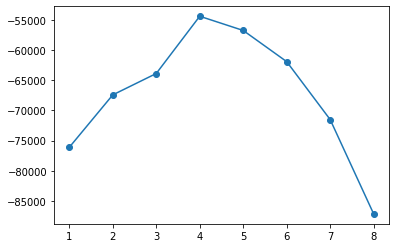

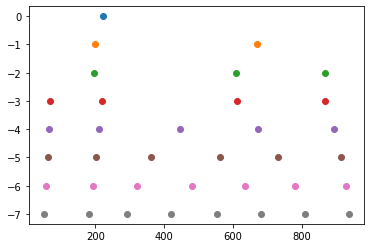

In [41]:
plt.plot(np.arange(init.max_bumps())+1, iterative_results.likelihoods,'o-')
plt.show()
for nbump in np.arange(init.max_bumps()):
    times = init.bump_times(iterative_results.sel(n_bumps=nbump),nbump)
    plt.plot(np.cumsum(times), -np.repeat(nbump, len(times)),'o')


Applying loocv on this method

In [8]:
#Looping over possible number of bumps
subjects_idx = np.unique(subjects)
likelihoods_loo_classic = []

for subject in subjects_idx:
    print(f'Subject {subject}')
    #Extracting data from left out subject
    subjects_idx_loo = subjects_idx[subjects_idx != subject]

    starts_left_out_idx = np.array([starts[idx] for idx, s in enumerate(subjects) if s not in subjects_idx_loo])
    ends_left_out_idx = np.array([ends[idx] for idx, s in enumerate(subjects) if s not in subjects_idx_loo])

    #Correct starts indexes to account for reoved subject, whole indexing needs improvement
    starts_loo = np.concatenate([starts[starts < starts_left_out_idx[0]], starts[starts > ends_left_out_idx[-1]]-ends_left_out_idx[-1]+1])
    ends_loo = np.concatenate([ends[ends < starts_left_out_idx[0]], ends[ends > ends_left_out_idx[-1]]-ends_left_out_idx[-1]])
    ends_loo[-1] = ends_loo[-1]-1
    starts_left_out = np.array([start - starts_left_out_idx[0]  for start in starts if start >= starts_left_out_idx[0] and start <= ends_left_out_idx[-1]])
    ends_left_out = np.array([end - starts_left_out_idx[0]  for end in ends if end >= starts_left_out_idx[0] and end <= ends_left_out_idx[-1]])


    samples_loo = np.array([sample for idx,sample in enumerate(data) if idx < starts_left_out_idx[0] or idx > ends_left_out_idx[-1]])
    samples_left_out = np.array([sample for idx,sample in enumerate(data) if idx >= starts_left_out_idx[0] and idx <= ends_left_out_idx[-1]])
    #Fitting the HsMM using previous estimated parameters as initial parameters
    model_loo = hsmm.hsmm(samples_loo, starts_loo, ends_loo, sf=100)
    with multiprocessing.Pool(processes=cpus) as pool:
        iterative_results_loo = pool.starmap(model_loo.fit_single, 
            zip(np.arange(1,init.max_bumps()+1),#init.max_bumps to ensure that same number of maxbumps
                iterative_results.magnitudes, iterative_results.parameters, itertools.repeat(1), itertools.repeat(False), itertools.repeat(True)))
    iterative_results_loo = xr.concat(iterative_results_loo, dim="n_bumps")
    
    model_left_out = hsmm.hsmm(samples_left_out, starts_left_out, ends_left_out, sf=100)
    with multiprocessing.Pool(processes=cpus) as pool:
        likelihoods = pool.starmap(model_left_out.calc_EEG_50h, 
            zip(iterative_results_loo.magnitudes,
                iterative_results_loo.parameters,
                np.arange(1,init.max_bumps()+1),itertools.repeat(True),itertools.repeat(True)))
    likelihoods_loo_classic.append(likelihoods)
    np.save('likelihoods_loo_classic',likelihoods_loo_classic)

Subject 0
Estimating parameters for 1 bumps model
Estimating parameters for 2 bumps model
Estimating parameters for 3 bumps model
Estimating parameters for 4 bumps model
Estimating parameters for 5 bumps model
Estimating parameters for 6 bumps model
Estimating parameters for 7 bumps model
Estimating parameters for 8 bumps model
Parameters estimated for 1 bumps model
Parameters estimated for 2 bumps model
Parameters estimated for 3 bumps model
Parameters estimated for 4 bumps model
Parameters estimated for 5 bumps model
Parameters estimated for 6 bumps model
Parameters estimated for 7 bumps model
Parameters estimated for 8 bumps model
Subject 1
Estimating parameters for 1 bumps model
Estimating parameters for 2 bumps model
Estimating parameters for 3 bumps model
Estimating parameters for 4 bumps model
Estimating parameters for 5 bumps model
Estimating parameters for 6 bumps model
Estimating parameters for 7 bumps model
Estimating parameters for 8 bumps model
Parameters estimated for 3 b